# All chronic conditions in one model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Don't forget to use `ml_env` environment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector


In [2]:
# cleaning function when reading new files and set display in the notebook outputs
pd.set_option('display.max_columns', 50)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [3]:
inpatient_path   = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient_path  = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train_path       = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
beneficiary_path = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
# path = '/GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis'
# /GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis
# read inpatient outpatient and train files data
inpatient  = pd.read_csv(inpatient_path).rename(columns=clear_cols)
outpatient = pd.read_csv(outpatient_path).rename(columns=clear_cols)
train      = pd.read_csv(train_path).rename(columns=clear_cols)
bene       = pd.read_csv(beneficiary_path).rename(columns=clear_cols)

In [4]:
print(train.shape)
train.sample()

(5410, 2)


,Provider,PotentialFraud
3093,PRV54871,No


In [5]:
print(inpatient.shape)
inpatient.sample()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
23663,BENE97687,CLM46590,2009-04-11,2009-04-18,PRV54772,28000,PHY335375,PHY401145,PHY341362,2009-04-11,7866,1068.0,2009-04-18,177,1623,2449,4019,3899,1961,V103,4148,E8786,1985,NaN,3249.0,NaN,NaN,NaN,NaN,NaN


In [6]:
print(outpatient.shape)
outpatient.sample()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
370655,BENE117171,CLM648386,2009-10-25,2009-10-25,PRV53790,60,PHY364595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
print(bene.shape)
bene.sample()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
122582,BENE142132,1941-02-01,NaN,2,1,0,10,120,12,12,2,2,1,2,1,2,1,2,2,1,2,0,0,290,280


In [8]:
bene.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [18]:
bene['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

In [17]:
# # Identify chronic disease columns (assuming they have 'Chronic' in their name)
# chronic_cols = [col for col in bene.columns if 'Chronic' in col]

# bene[chronic_cols] = bene[chronic_cols].replace(2, 0)

# # Count number of diseases per beneficiary
# bene['ChronicDiseaseCount'] = bene[chronic_cols].count(axis=1)


# Identify chronic disease columns
chronic_cols = [col for col in bene.columns if 'Chronic' in col]

# Replace all 2s with 0s in the chronic disease columns
bene[chronic_cols] = bene[chronic_cols].replace(2, 0)

# Count only occurrences of 1 in each row
bene['ChronicDiseaseCount'] = (bene[chronic_cols] == 1).sum(axis=1)

# Display the first few rows
bene#[['BeneID', 'ChronicDiseaseCount']]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ChronicDiseaseCount
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,1,0,0,0,0,0,0,0,0,0,0,0,0,430,460,1
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,1,0,0,0,0,0,1,0,0,0,0,0,0,880,100,2
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,0,1,1,1,0,1,1,1,0,0,0,2000,1068,3240,1390,6
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,1,1,0,0,0,0,0,1,0,0,0,0,0,2650,10,3


In [13]:
bene.sample()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ChronicDiseaseCount
134290,BENE154604,1942-07-01,NaN,2,1,0,32,80,12,12,0,0,0,0,1,0,1,1,0,0,0,11030,1068,0,20,41


In [19]:
bene.columns.to_list()

['BeneID',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'ChronicDiseaseCount']

In [26]:
bene1 = bene[['BeneID', 'ChronicDiseaseCount']]

In [30]:
df = pd.merge(
    inpatient,
    bene1,
    on='BeneID',
    how='left'
    )
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ChronicDiseaseCount
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,7
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,6
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,5


In [42]:
df = df[['BeneID', 'Provider']].drop_duplicates()


In [43]:
bene1.sample()

,BeneID,ChronicDiseaseCount
76077,BENE92438,5


In [44]:
inpatient_pairs = pd.merge(
    df,
    bene1,
    on='BeneID',
    how='left'
    )
inpatient_pairs

,BeneID,Provider,ChronicDiseaseCount
0,BENE11001,PRV55912,7
1,BENE11001,PRV55907,7
2,BENE11001,PRV56046,7
3,BENE11011,PRV52405,6
4,BENE11014,PRV56614,5
...,...,...,...
36611,BENE159167,PRV53671,2
36612,BENE159175,PRV54981,3
36613,BENE159177,PRV56588,9
36614,BENE159177,PRV56575,9


In [47]:
inpatient_pairs = inpatient_pairs.groupby('Provider').agg(
    IP_mean_chronic = ('ChronicDiseaseCount', 'mean'),
    IP_std_chronic = ('ChronicDiseaseCount', 'std'),
    IPmax_chronic = ('ChronicDiseaseCount', 'max')
    ).reset_index()

In [48]:
inpatient_pairs

,Provider,IP_mean_chronic,IP_std_chronic,IPmax_chronic
0,PRV51001,6.000000,3.240370,10
1,PRV51003,4.679245,2.326880,10
2,PRV51007,5.666667,0.577350,6
3,PRV51008,3.500000,0.707107,4
4,PRV51011,7.000000,NaN,7
...,...,...,...,...
2087,PRV57719,7.250000,0.957427,8
2088,PRV57728,0.000000,NaN,0
2089,PRV57729,6.900000,2.330951,9
2090,PRV57732,5.454545,1.967925,8


In [49]:
bene1

,BeneID,ChronicDiseaseCount
0,BENE11001,7
1,BENE11002,0
2,BENE11003,2
3,BENE11004,6
4,BENE11005,2
...,...,...
138551,BENE159194,1
138552,BENE159195,2
138553,BENE159196,6
138554,BENE159197,3


In [57]:
outpatient_pairs = outpatient[['BeneID', 'Provider']].drop_duplicates()
outpatient_pairs

,BeneID,Provider
0,BENE11002,PRV56011
1,BENE11003,PRV57610
2,BENE11003,PRV57595
3,BENE11004,PRV56011
10,BENE11004,PRV55951
...,...,...
517726,BENE159198,PRV53672
517728,BENE159198,PRV53699
517729,BENE159198,PRV53670
517733,BENE159198,PRV53702


In [58]:
bene1

,BeneID,ChronicDiseaseCount
0,BENE11001,7
1,BENE11002,0
2,BENE11003,2
3,BENE11004,6
4,BENE11005,2
...,...,...
138551,BENE159194,1
138552,BENE159195,2
138553,BENE159196,6
138554,BENE159197,3


In [59]:
outpatient_pairs = pd.merge(
    outpatient_pairs,
    bene1,
    on='BeneID',
    how='left'
    )

In [60]:
outpatient_pairs

,BeneID,Provider,ChronicDiseaseCount
0,BENE11002,PRV56011,0
1,BENE11003,PRV57610,2
2,BENE11003,PRV57595,2
3,BENE11004,PRV56011,6
4,BENE11004,PRV55951,6
...,...,...,...
330816,BENE159198,PRV53672,5
330817,BENE159198,PRV53699,5
330818,BENE159198,PRV53670,5
330819,BENE159198,PRV53702,5


In [61]:
outpatient_pairs = outpatient_pairs.groupby('Provider').agg(
    OP_mean_chronic = ('ChronicDiseaseCount', 'mean'),
    OP_std_chronic = ('ChronicDiseaseCount', 'std'),
    OPmax_chronic = ('ChronicDiseaseCount', 'max')
    ).reset_index()
outpatient_pairs

,Provider,OP_mean_chronic,OP_std_chronic,OPmax_chronic
0,PRV51001,5.421053,1.677160,9
1,PRV51003,4.257576,2.207056,10
2,PRV51004,4.318841,2.482010,9
3,PRV51005,3.884848,2.321540,9
4,PRV51007,3.821429,2.382567,8
...,...,...,...,...
5007,PRV57759,5.250000,2.211629,10
5008,PRV57760,3.777778,1.986063,8
5009,PRV57761,4.746269,2.530680,9
5010,PRV57762,5.000000,NaN,5


In [62]:
# Merge IP and OP providers to get the whole patients in one table 
provider_claims = pd.merge(
    inpatient_pairs,  
    outpatient_pairs,  
    on='Provider',
    how='outer'
).fillna(0)  # Fill NaN with 0 for providers with only one type of claims
provider_claims

,Provider,IP_mean_chronic,IP_std_chronic,IPmax_chronic,OP_mean_chronic,OP_std_chronic,OPmax_chronic
0,PRV51001,6.000000,3.24037,10.0,5.421053,1.677160,9.0
1,PRV51003,4.679245,2.32688,10.0,4.257576,2.207056,10.0
2,PRV51004,0.000000,0.00000,0.0,4.318841,2.482010,9.0
3,PRV51005,0.000000,0.00000,0.0,3.884848,2.321540,9.0
4,PRV51007,5.666667,0.57735,6.0,3.821429,2.382567,8.0
...,...,...,...,...,...,...,...
5405,PRV57759,0.000000,0.00000,0.0,5.250000,2.211629,10.0
5406,PRV57760,0.000000,0.00000,0.0,3.777778,1.986063,8.0
5407,PRV57761,0.000000,0.00000,0.0,4.746269,2.530680,9.0
5408,PRV57762,0.000000,0.00000,0.0,5.000000,0.000000,5.0


In [63]:
# Then merge with fraud labels
final_df = pd.merge(
    provider_claims,
    train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)
final_df

,Provider,IP_mean_chronic,IP_std_chronic,IPmax_chronic,OP_mean_chronic,OP_std_chronic,OPmax_chronic,PotentialFraud
0,PRV51001,6.000000,3.24037,10.0,5.421053,1.677160,9.0,No
1,PRV51003,4.679245,2.32688,10.0,4.257576,2.207056,10.0,Yes
2,PRV51004,0.000000,0.00000,0.0,4.318841,2.482010,9.0,No
3,PRV51005,0.000000,0.00000,0.0,3.884848,2.321540,9.0,Yes
4,PRV51007,5.666667,0.57735,6.0,3.821429,2.382567,8.0,No
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.000000,0.00000,0.0,5.250000,2.211629,10.0,No
5406,PRV57760,0.000000,0.00000,0.0,3.777778,1.986063,8.0,No
5407,PRV57761,0.000000,0.00000,0.0,4.746269,2.530680,9.0,No
5408,PRV57762,0.000000,0.00000,0.0,5.000000,0.000000,5.0,No


In [64]:
# preper the binary column for modeling ("1,0" instead of "Yes" and "No")
final_df['PotentialFraud'] = final_df['PotentialFraud'].map({'Yes': 1, 'No': 0})
final_df

,Provider,IP_mean_chronic,IP_std_chronic,IPmax_chronic,OP_mean_chronic,OP_std_chronic,OPmax_chronic,PotentialFraud
0,PRV51001,6.000000,3.24037,10.0,5.421053,1.677160,9.0,0
1,PRV51003,4.679245,2.32688,10.0,4.257576,2.207056,10.0,1
2,PRV51004,0.000000,0.00000,0.0,4.318841,2.482010,9.0,0
3,PRV51005,0.000000,0.00000,0.0,3.884848,2.321540,9.0,1
4,PRV51007,5.666667,0.57735,6.0,3.821429,2.382567,8.0,0
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.000000,0.00000,0.0,5.250000,2.211629,10.0,0
5406,PRV57760,0.000000,0.00000,0.0,3.777778,1.986063,8.0,0
5407,PRV57761,0.000000,0.00000,0.0,4.746269,2.530680,9.0,0
5408,PRV57762,0.000000,0.00000,0.0,5.000000,0.000000,5.0,0


In [65]:
# a short helper to get the relevant columns for the model features
final_df.columns

Index(['Provider', 'IP_mean_chronic', 'IP_std_chronic', 'IPmax_chronic',
       'OP_mean_chronic', 'OP_std_chronic', 'OPmax_chronic', 'PotentialFraud'],
      dtype='object')

In [66]:
# Last preperation for modeling
# X is the features. here I will choose the feeatures that the model will try to analyze, 
# base on this data if the specific `y` (provider) is a fraud or not
X = final_df[[
    'IP_mean_chronic', 'IP_std_chronic', 'IPmax_chronic', #IP
    'OP_mean_chronic', 'OP_std_chronic', 'OPmax_chronic']] # OP

In [67]:
# 
y = final_df['PotentialFraud']

In [68]:
# 1. Split
# Now we'll splpit the data into train and test, usually, 80% train in my case here.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [69]:
# 2. Scale the features (standardization: mean = 0, std = 1).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, then transform
X_test = scaler.transform(X_test)  # Transform test data using train's mean & std


In [70]:
# 3. Train a logistic regression model.
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Fit model on training data

LogisticRegression(random_state=42)

In [71]:
# 4. Make predictions on the test set.
y_predict = model.predict(X_test)  # Outputs predicted class labels (0 or 1)

y_proba = model.predict_proba(X_test)[:, 1] # Outputs predicted class labels (0 or 1)


In [72]:
# Now it's time to create the confusion matrix.
# in sklearn, the setup for it is: TP is the bottom right, FN bottom left, TN top left and FP top right.
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[962  15]
 [ 80  25]]


In [73]:
# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
# print('Confusion Matrix before manipulating by adding the threshold:\n')

# Calculating metrics
accuracy = accuracy_score(y_test, y_predict) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.91
Precision: 0.62
Recall: 0.24
F1 Score: 0.34


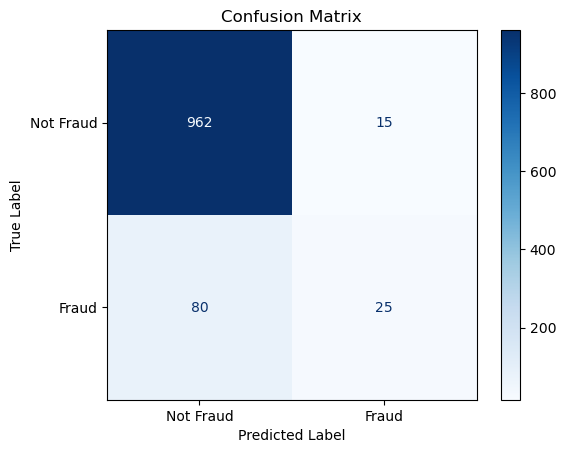

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

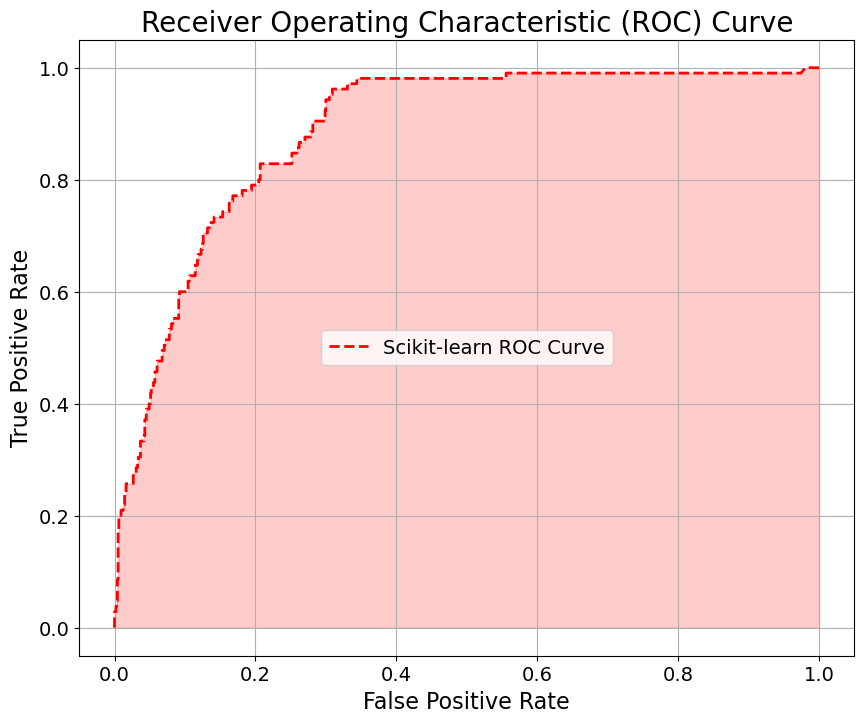

In [75]:
from sklearn.metrics import roc_curve

# Compare with scikit-learn's implementation
# Set up the figure first
fig, ax = plt.subplots(figsize=(10, 8))
# Compare with scikit-learn's implementation
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, 'r--', lw=2, label=f'Scikit-learn ROC Curve') #(AUC = {roc_auc:.2f})')
# Fill under the ROC curve
ax.fill_between(fpr, tpr, alpha=0.2, color='red')  # alpha=0.2 makes it somewhat transparent
# Add styling with larger fonts
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True)

In [76]:
from sklearn.metrics import auc
# Area Under Curve
auc(fpr, tpr)

np.float64(0.8863576546278696)

# This park suppose to help me to fine tune the best accuracy (which is not the most important now)

In [59]:
# Perform Sequential Feature Selector with n=1 and build on above code
from sklearn.feature_selection import SequentialFeatureSelector
# I can adjust the n_features_to_select: 1, to get the best feature, 
# 2 will give me more, but unnecessary combine them will give the bset results.
sfs = SequentialFeatureSelector(model, n_features_to_select=4)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                          n_features_to_select=4)

In [60]:
selected_features = X.columns[sfs.get_support()].to_list()
print(f"Features selected by SFS: {selected_features}")

Features selected by SFS: ['IPInscClaimAmtReimbursedMean', 'IPInscClaimAmtReimbursedSum', 'IPInscClaimAmtReimbursedStd', 'OPInscClaimAmtReimbursedSum']


### loooking for a better threshold to find better f1 score:

In [24]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

In [25]:
precicions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precicions * recalls) / (precicions + recalls)
best_threshold = thresholds[f1_scores.argmax()]
print(f"Optimal threshold based on F1-score: {best_threshold}")

Optimal threshold based on F1-score: 0.16112487056785005


In [26]:
# apply the new best threshold to the predicted probabilities
y_pred_custom = (y_proba >= best_threshold).astype(int)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[907  70]
 [ 30  75]]


array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_custom) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.93
Precision: 0.73
Recall: 0.41
F1 Score: 0.52


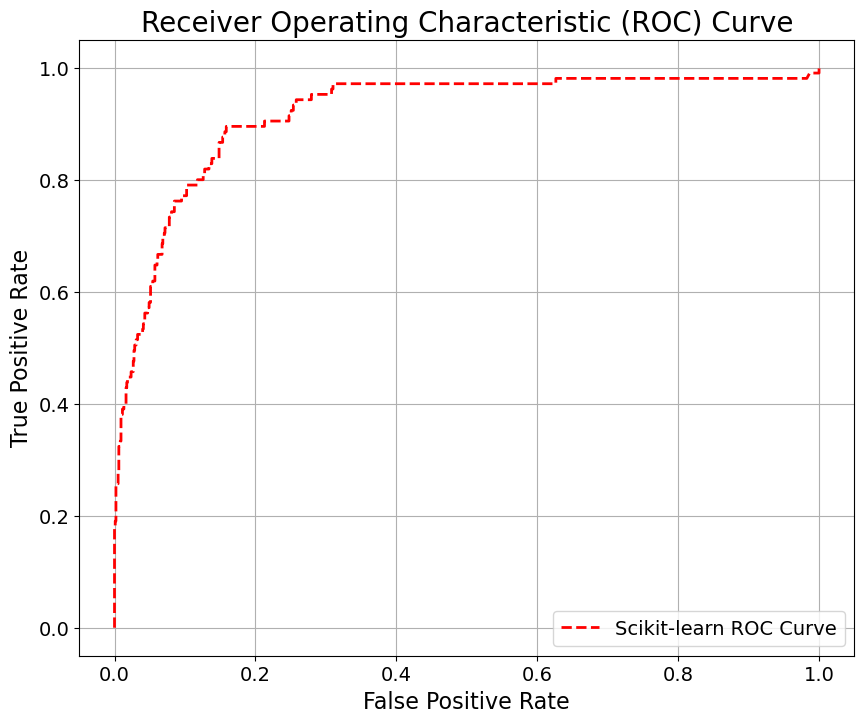

In [32]:
from sklearn.metrics import roc_curve

# Compare with scikit-learn's implementation
# Set up the figure first
fig, ax = plt.subplots(figsize=(10, 8))
# Compare with scikit-learn's implementation
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, 'r--', lw=2, label=f'Scikit-learn ROC Curve') #(AUC = {roc_auc:.2f})')
# Add styling with larger fonts
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True)

In [33]:
from sklearn.metrics import auc
# Area Under Curve
auc(fpr, tpr)

np.float64(0.9185650923624311)

# This part is here to check only a few freaturs for the model from the ones above

In [94]:
X = final_df[['IPInscClaimAmtReimbursedMean', 
              'IPInscClaimAmtReimbursedSum', 
              'IPInscClaimAmtReimbursedStd', 
              'OPInscClaimAmtReimbursedSum']] # OP

In [95]:
y = final_df['PotentialFraud']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [97]:
# 2. Scale the features (standardization: mean = 0, std = 1).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, then transform
X_test = scaler.transform(X_test)  # Transform test data using train's mean & std


In [98]:
# 3. Train a logistic regression model.
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Fit model on training data

LogisticRegression(random_state=42)

In [99]:
# 4. Make predictions on the test set.
y_predict = model.predict(X_test)  # Outputs predicted class labels (0 or 1)

y_proba = model.predict_proba(X_test)[:, 1] # Outputs predicted class labels (0 or 1)


In [100]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[964  13]
 [ 64  41]]


In [101]:
# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
# print('Confusion Matrix before manipulating by adding the threshold:\n')

# Calculating metrics
accuracy = accuracy_score(y_test, y_predict) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.93
Precision: 0.76
Recall: 0.39
F1 Score: 0.52


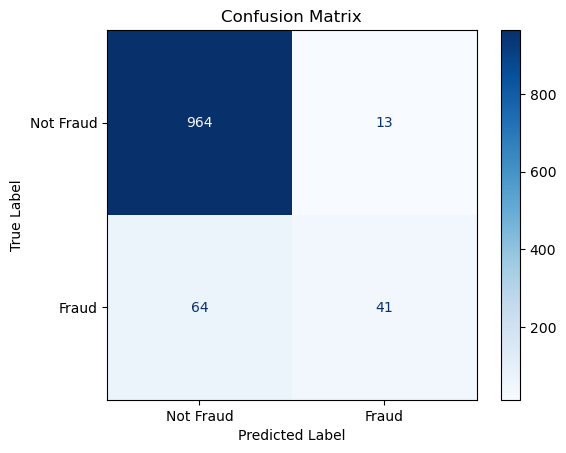

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

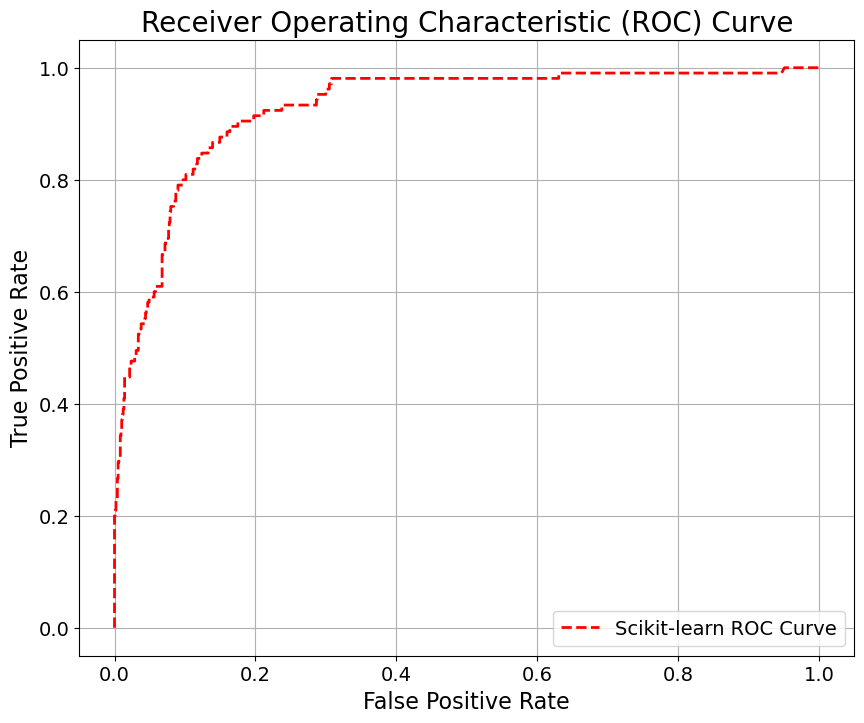

In [103]:
from sklearn.metrics import roc_curve

# Compare with scikit-learn's implementation
# Set up the figure first
fig, ax = plt.subplots(figsize=(10, 8))
# Compare with scikit-learn's implementation
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, 'r--', lw=2, label=f'Scikit-learn ROC Curve') #(AUC = {roc_auc:.2f})')
# Add styling with larger fonts
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True)

In [104]:
from sklearn.metrics import auc
# Area Under Curve
auc(fpr, tpr)

np.float64(0.9276599892771846)